## Results metrics

A threshold "T" is used to classify a test case to be either a correct (true or positive) case or false (negative) case. If the case is below a threshold "T" then it is classified false (negative) and if it is above threshold "T" it is classified true (positive).

**FPIR**: is the false positive identification rate. It is the ratio of the test cases that are classified as true cases although they are false cases. It is type I error. 
FPIR= Number of test cases classified above threshold "T" (true) / Number of all test cases

**FNIR**: is the false negative identification rate. It is  the ratio of the test cases that are classified as false cases although they are true cases. It is type II error.
FNIR= Number of test cases classified below threshold "T" (false) / Number of all test cases

In [242]:
# Load libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
sns.set(style="white") 
%matplotlib inline

## MagFace Results

**False Negatives**
FNIR represent the proportion of feature vectors that belong to a certain class but are incorrectly classified as not belonging to that class.

##### Load data - children

In [243]:
# Children feature vectors
with open('../data/feat_children.list', 'r') as f:
    lines = f.readlines()


In [244]:
img_2_feats = {}
img_2_mag = {}
# Convert to dictionary as adaface - is done in img_2_feats
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    imgname = "/"+"/".join(imgname.split("/")[4:])
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag #magnitude of the feature vector

In [245]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags) #sorts the magnitude/quality of the images

In [246]:
len(lines)

3306

In [247]:
# For all Ids, get last id name and convert to unique ids
def convert_unique_ids(ids):
    unique_ids_list = []
    for id in ids:
        im_id = id.split("/")[-1][:-4]
        if '.' in im_id:
            un_id = im_id.split("_")[0]
        else:
            un_id = '_'.join(im_id.split("_")[:-1])
            
        unique_ids_list.append(un_id)
    return unique_ids_list
        

In [248]:
#feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx[:10]])
#feats = np.array([img_2_feats[imgnames[ele]] for ele in range(10)]) #unsorted image quality
#ids = np.array([imgnames[ele] for ele in range(10)])

feats = np.array([img_2_feats[imgnames[ele]] for ele in range(len(lines))]) #unsorted image quality
ids = np.array([imgnames[ele] for ele in range(len(lines))])

sim_mat = np.dot(feats, feats.T)

In [249]:
ids

array(['/data/raw_full/children/children/Indian_682/Indian_682_8.png',
       '/data/raw_full/children/children/Indian_682/Indian_682_34.png',
       '/data/raw_full/children/children/Indian_682/Indian_682_32.png',
       ..., '/data/raw_full/children/children/Asian_386/Asian_386_38.png',
       '/data/raw_full/children/children/African_32/African_32_0.png',
       '/data/raw_full/children/children/African_32/African_32_3.png'],
      dtype='<U71')

In [250]:
def factorize_ids(ids):
    unique_ids = {}
    factors = []
    for id in ids:
        if id not in unique_ids:
            unique_ids[id] = len(unique_ids)  # Assign a unique index for each unique ID
        factors.append(unique_ids[id])  # Append the index corresponding to the ID
    return factors, unique_ids

# Example usage:
ids = convert_unique_ids(ids)
factors_c, unique_ids = factorize_ids(ids)
print("Factorized list:", factors_c[:10])
print("Unique IDs mapping:", unique_ids)

Factorized list: [0, 0, 0, 1, 2, 2, 3, 4, 4, 5]
Unique IDs mapping: {'Indian_682': 0, 'Asian_119': 1, 'Asian_504': 2, 'Caucasian_73': 3, 'Caucasian_249': 4, 'm.01w1069': 5, 'Caucasian_363': 6, 'm.05n': 7, 'Asian_185': 8, 'African_713': 9, 'Indian_702': 10, 'African_627': 11, 'm.06ljz3': 12, 'African_433': 13, 'm.03vq05': 14, 'African_265': 15, 'Asian_59': 16, 'African_415': 17, 'African_274': 18, 'Indian_458': 19, 'Caucasian_244': 20, 'm.0j259dq': 21, 'African_571': 22, 'African_246': 23, 'African_743': 24, 'African_486': 25, 'Asian_137': 26, 'm.04gh78q': 27, 'Indian_711': 28, 'Asian_672': 29, 'Indian_115': 30, 'Asian_638': 31, 'Indian_267': 32, 'African_665': 33, 'Indian_474': 34, 'African_767': 35, 'Indian_346': 36, 'Caucasian_1323': 37, 'Indian_442': 38, 'Indian_676': 39, 'Asian_420': 40, 'African_305': 41, 'Indian_616': 42, 'm.04y7f4r': 43, 'm.0d5060': 44, 'Indian_484': 45, 'm.05sxmf7': 46, 'm.0gcslnm': 47, 'm.05t2cs': 48, 'Asian_663': 49, 'Indian_635': 50, 'Caucasian_167': 51, 'In

In [251]:
im_ids = np.array(factors_c)

In [252]:
# Analyze similarity scores in terms of threshold...
# For the first 10 similarity scores - what is the distribution of the scores?
sim_scores = sim_mat


In [253]:
## Data check

sim_scores = sim_mat.copy()
# E.g. classify all identities as positive if threshold is higher than 90% of all similarity scores
sims_excluding_probe = sim_scores[sim_scores < 0.9999] # OBs check if more scientific way
# Check that length of similarity scores are equal to len(sim_scores.flatten)- len(sim_scores)
print("Length of similarity scores without probe: ", len(sims_excluding_probe), "Equal to: ", len(sim_scores.flatten()) - len(sim_scores), 
      "is",len(sims_excluding_probe) == (len(sim_scores.flatten()) - len(sim_scores)))


Length of similarity scores without probe:  10926330 Equal to:  10926330 is True


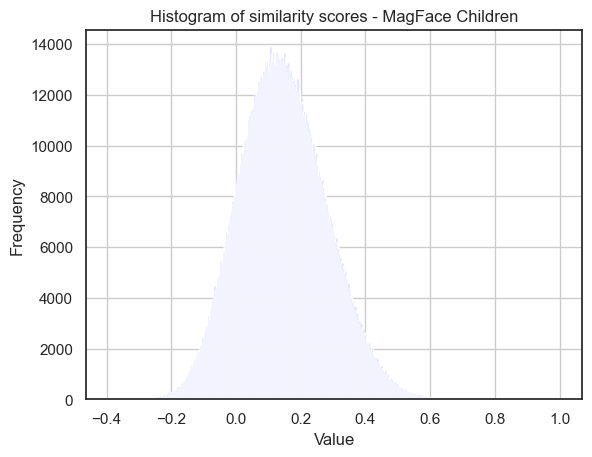

Average similarity score:  0.14614945447812053

Top 10% similarity score:  0.42232515616646227

Top 10 highest similarity score: [0.98039976 0.98039976 0.98334116 0.98334116 0.98468605 0.98468605
 0.98944222 0.98944222 0.99989667 0.99989667]

Max sim scores:  0.9998966723251195


In [254]:
# Convert tensor to NumPy array
plot_sims = sim_scores[sim_scores < 0.9999].reshape(-1) # filter out values equal to 1 #OBS check more scietific way
# Plot histogram
plt.hist(plot_sims, bins=len(sim_scores), color='blue',alpha=0.7)
plt.title('Histogram of similarity scores - MagFace Children')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Average similarity score: ", np.mean(plot_sims))
print("\nTop 10% similarity score: ", np.percentile(plot_sims, 97.5))
print("\nTop 10 highest similarity score:", np.sort(plot_sims)[-10:])
print("\nMax sim scores: ", np.max(plot_sims))

In [255]:
ids

['Indian_682',
 'Indian_682',
 'Indian_682',
 'Asian_119',
 'Asian_504',
 'Asian_504',
 'Caucasian_73',
 'Caucasian_249',
 'Caucasian_249',
 'm.01w1069',
 'Caucasian_363',
 'Caucasian_363',
 'm.05n',
 'Asian_185',
 'African_713',
 'African_713',
 'Indian_702',
 'African_627',
 'm.06ljz3',
 'African_433',
 'm.03vq05',
 'm.03vq05',
 'African_265',
 'African_265',
 'Asian_59',
 'Asian_59',
 'African_415',
 'African_274',
 'African_274',
 'Indian_458',
 'Caucasian_244',
 'm.0j259dq',
 'African_571',
 'African_246',
 'African_743',
 'African_486',
 'African_486',
 'Asian_137',
 'Asian_137',
 'Asian_137',
 'm.04gh78q',
 'Indian_711',
 'Indian_711',
 'Asian_672',
 'Indian_115',
 'Indian_115',
 'Indian_115',
 'Asian_638',
 'Indian_267',
 'African_665',
 'African_665',
 'Indian_474',
 'African_767',
 'African_767',
 'African_767',
 'Indian_346',
 'Caucasian_1323',
 'Indian_442',
 'Indian_442',
 'Indian_676',
 'Asian_420',
 'Asian_420',
 'African_305',
 'Indian_616',
 'm.04y7f4r',
 'm.0d5060',
 

In [256]:
im_ids

array([   0,    0,    0, ..., 2020, 2021, 2021])

##### Load children data canonical

In [257]:
df_c_can = pd.read_csv("../data/OFIQ_results/canonical_children.csv", sep=";")

In [258]:
# Get canonical ids and respective feature vectors
imgnames_can = [imgnames[ele] for ele in range(len(lines)) if imgnames[ele].split("/")[-1] in np.array(df_c_can.Filename)]
feats_can = np.array([img_2_feats[imgnames_can[ele]] for ele in range(len(imgnames_can))]) #unsorted image quality

sim_mat_can = np.dot(feats_can, feats_can.T)

In [259]:
ids_can = convert_unique_ids(imgnames_can)
factors_can, unique_ids_can = factorize_ids(imgnames_can)
im_ids_can = np.array(factors_can)
print("Factorized list:", factors_can[:10])
print("Unique IDs mapping:", unique_ids_can)
print("Image IDs mapping:", im_ids_can)

Factorized list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique IDs mapping: {'/data/raw_full/children/children/Indian_682/Indian_682_32.png': 0, '/data/raw_full/children/children/Asian_504/Asian_504_86.png': 1, '/data/raw_full/children/children/Asian_504/Asian_504_89.png': 2, '/data/raw_full/children/children/Asian_m.01w1069/m.01w1069_0002.jpg': 3, '/data/raw_full/children/children/Asian_185/Asian_185_18.png': 4, '/data/raw_full/children/children/African_627/African_627_0.png': 5, '/data/raw_full/children/children/African_433/African_433_3.png': 6, '/data/raw_full/children/children/Caucasian_m.03vq05/m.03vq05_0003.jpg': 7, '/data/raw_full/children/children/African_265/African_265_15.png': 8, '/data/raw_full/children/children/Asian_59/Asian_59_0.png': 9, '/data/raw_full/children/children/African_415/African_415_0.png': 10, '/data/raw_full/children/children/African_274/African_274_4.png': 11, '/data/raw_full/children/children/Indian_458/Indian_458_0.png': 12, '/data/raw_full/children/children/Af

In [260]:
## Data check

sim_score_can = sim_mat_can.copy()
# E.g. classify all identities as positive if threshold is higher than 90% of all similarity scores
sims_excluding_probe_can = sim_score_can[sim_score_can < 0.9999] # OBs check if more scientific way
# Check that length of similarity scores are equal to len(sim_scores.flatten)- len(sim_scores)
print("Length of similarity scores without probe: ", len(sims_excluding_probe_can), "Equal to: ", len(sim_score_can.flatten()) - len(sim_score_can), 
      "is",len(sims_excluding_probe_can) == (len(sim_score_can.flatten()) - len(sim_score_can)))


Length of similarity scores without probe:  2561600 Equal to:  2561600 is True


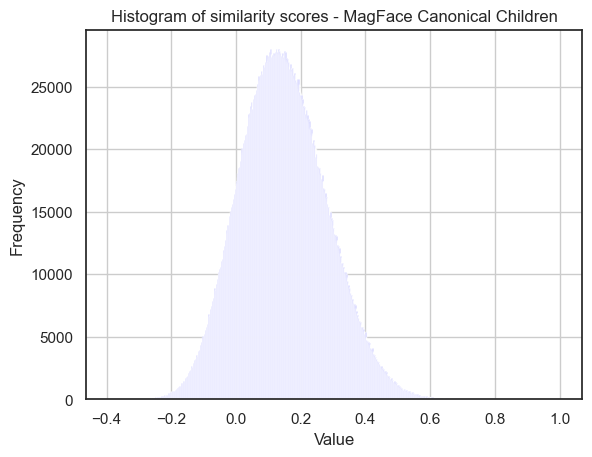

Average similarity score:  0.13716368803082954

Top 10% similarity score:  0.4165981756598543

Top 10 highest similarity score: [0.98039976 0.98039976 0.98334116 0.98334116 0.98468605 0.98468605
 0.98944222 0.98944222 0.99989667 0.99989667]

Max sim scores:  0.9998966723251195


In [261]:
# Convert tensor to NumPy array
plot_sims_can = sim_score_can[sim_score_can < 0.9999].reshape(-1) # filter out values equal to 1 #OBS check more scietific way
# Plot histogram
plt.hist(plot_sims, bins=len(sim_score_can), color='blue',alpha=0.7)
plt.title('Histogram of similarity scores - MagFace Canonical Children')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Average similarity score: ", np.mean(plot_sims_can))
print("\nTop 10% similarity score: ", np.percentile(plot_sims_can, 97.5))
print("\nTop 10 highest similarity score:", np.sort(plot_sims_can)[-10:])
print("\nMax sim scores: ", np.max(plot_sims_can))

##### Load data - adults


In [262]:
# Children feature vectors
with open('../data/feat_adults.list', 'r') as f:
    lines = f.readlines()


In [263]:
img_2_feats = {}
img_2_mag = {}
# Convert to dictionary as adaface - is done in img_2_feats
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    imgname = "/"+"/".join(imgname.split("/")[4:])
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag #magnitude of the feature vector

In [264]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags) #sorts the magnitude/quality of the images

In [265]:
len(lines)

3306

In [266]:
#feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx[:10]])
#feats = np.array([img_2_feats[imgnames[ele]] for ele in range(10)]) #unsorted image quality
#ids = np.array([imgnames[ele] for ele in range(10)])

feats_a = np.array([img_2_feats[imgnames[ele]] for ele in range(len(lines))]) #unsorted image quality
ids_a = np.array([imgnames[ele] for ele in range(len(lines))])

sim_mat_a = np.dot(feats_a, feats_a.T)

In [267]:
# convert ids
ids_a = convert_unique_ids(ids_a)
factors_a, unique_ids = factorize_ids(ids)
print("Factorized list:", factors_a[:10])
print("Unique IDs mapping:", unique_ids)

Factorized list: [0, 0, 0, 1, 2, 2, 3, 4, 4, 5]
Unique IDs mapping: {'Indian_682': 0, 'Asian_119': 1, 'Asian_504': 2, 'Caucasian_73': 3, 'Caucasian_249': 4, 'm.01w1069': 5, 'Caucasian_363': 6, 'm.05n': 7, 'Asian_185': 8, 'African_713': 9, 'Indian_702': 10, 'African_627': 11, 'm.06ljz3': 12, 'African_433': 13, 'm.03vq05': 14, 'African_265': 15, 'Asian_59': 16, 'African_415': 17, 'African_274': 18, 'Indian_458': 19, 'Caucasian_244': 20, 'm.0j259dq': 21, 'African_571': 22, 'African_246': 23, 'African_743': 24, 'African_486': 25, 'Asian_137': 26, 'm.04gh78q': 27, 'Indian_711': 28, 'Asian_672': 29, 'Indian_115': 30, 'Asian_638': 31, 'Indian_267': 32, 'African_665': 33, 'Indian_474': 34, 'African_767': 35, 'Indian_346': 36, 'Caucasian_1323': 37, 'Indian_442': 38, 'Indian_676': 39, 'Asian_420': 40, 'African_305': 41, 'Indian_616': 42, 'm.04y7f4r': 43, 'm.0d5060': 44, 'Indian_484': 45, 'm.05sxmf7': 46, 'm.0gcslnm': 47, 'm.05t2cs': 48, 'Asian_663': 49, 'Indian_635': 50, 'Caucasian_167': 51, 'In

In [268]:
## Data check
sim_scores_a = sim_mat_a.copy()
# E.g. classify all identities as positive if threshold is higher than 90% of all similarity scores
sims_excluding_probe = sim_scores_a[sim_scores_a < 0.99] # OBs check if more scientific way
# Check that length of similarity scores are equal to len(sim_scores.flatten)- len(sim_scores)
print("Length of similarity scores without probe: ", len(sims_excluding_probe), "Equal to: ", len(sim_scores_a.flatten()) - len(sim_scores_a), 
      "is",len(sims_excluding_probe) == (len(sim_scores_a.flatten()) - len(sim_scores_a)))


Length of similarity scores without probe:  10926330 Equal to:  10926330 is True


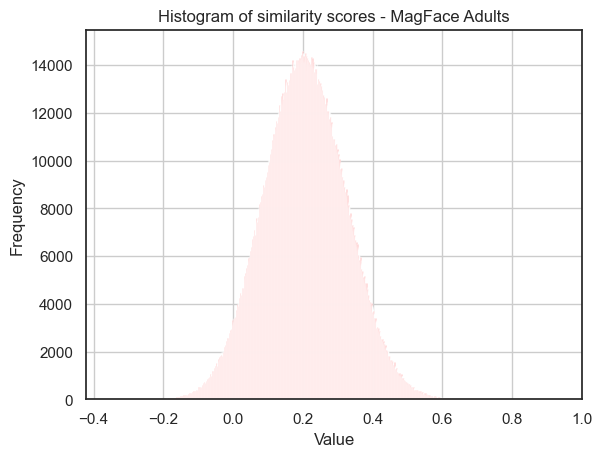

Average similarity score:  0.20604788258925932

Top 10% similarity score:  0.4404752278903723

Top 10 highest similarity score: [0.80635714 0.80635714 0.80751627 0.80751627 0.83381147 0.83381147
 0.88859401 0.88859401 0.93653139 0.93653139]

Max sim scores:  0.9365313871699896


In [269]:
# Analyze similarity scores in terms of threshold...
# For the first 10 similarity scores - what is the distribution of the scores?
plot_sims_a = sim_scores_a[sim_scores_a < 0.999].reshape(-1) # filter out values equal to 1 #OBS check more scietific way
# Plot histogram
plt.hist(plot_sims_a, bins=len(sim_scores_a), color='red', alpha=0.5)
plt.title('Histogram of similarity scores - MagFace Adults')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Average similarity score: ", np.mean(plot_sims_a))
print("\nTop 10% similarity score: ", np.percentile(plot_sims_a, 97.5))
print("\nTop 10 highest similarity score:", np.sort(plot_sims_a)[-10:])
print("\nMax sim scores: ", np.max(plot_sims_a))

##### Load data children - canonical

### Convert stats
+ find threshold

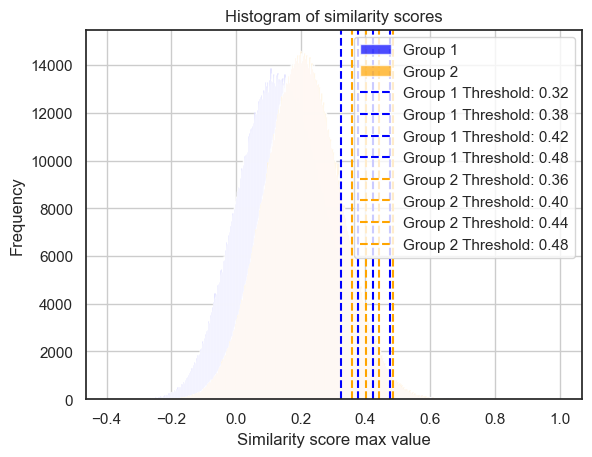

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# Define quantiles
quantiles = [90, 95, 97.5, 99]

# Calculate threshold values for each group and each quantile
thresholds_1 = [np.percentile(plot_sims, q) for q in quantiles]
thresholds_2 = [np.percentile(plot_sims_a, q) for q in quantiles]

# Plot histograms for both groups
plt.hist(plot_sims, bins=len(sim_scores), color='blue', alpha=0.7, label='Group 1')
plt.hist(plot_sims_a, bins=len(sim_scores_a), color='orange', alpha=0.7, label='Group 2')
plt.title('Histogram of similarity scores')
plt.xlabel('Similarity score max value')
plt.ylabel('Frequency')

# Plot threshold values for group 1
for threshold in thresholds_1:
    plt.axvline(x=threshold, color='blue', linestyle='--', label=f'Group 1 Threshold: {threshold:.2f}')

# Plot threshold values for group 2
for threshold in thresholds_2:
    plt.axvline(x=threshold, color='orange', linestyle='--', label=f'Group 2 Threshold: {threshold:.2f}')

plt.legend()
plt.grid(True)
plt.show()


Observation: a threshold at 0.48 can be set. That's approximately the 99th quantile for each. 

In [271]:
# How many ids above threshold? only approximatly 1% of the data? Does that approximately corresponds to how many mated samples there are?

((np.sum(sim_scores > 0.48)-3306) / len(sim_scores.flatten()))*100

0.9166819462240097

In [272]:
(np.sum(sim_scores_a > 0.48) / len(sim_scores_a.flatten()))*100

1.1423436242524454

In [273]:
len(im_ids)

3306

### FNIR and FPIR - functions

$$
\operatorname{FNIR}(N, R, T)=\frac{\left|\left\{i \in M_D \mid\left(\operatorname{rank}_i\left(m_i\right)>R\right) \operatorname{or}\left(\operatorname{score}_i\left(m_i\right) \leq T\right)\right\}\right|}{\left|M_D\right|}
$$
where:
$M_D \quad$ is the set of mated identification transactions with reference database $R$;
$m_i \quad$ is the mated reference for transaction $i$;
$\operatorname{rank}_i()$ gives the candidate rank of a reference in identification transaction $i$; and
$\operatorname{score}_i()$ gives the candidate score of a reference in identification transaction $i$.




$$
\operatorname{FPIR}(N, T)=\frac{\mid\left\{i \in U_D \mid \text { score }_i\left(t_i\right)>T\right\} \mid}{\left|U_D\right|}
$$
where:
$U_D \quad$ is the set of non-mated identification transactions with reference database $R$;
$t_i \quad$ is the top-ranked reference identifier in identification transaction $i$; and
score $_i()$ gives the candidate score of a reference in identification transaction $i$.

In [274]:
## Function for calculating FNIR 

def compute_fnir(mated_df, sim_scores, im_ids, ids, thold=0.5):

    # M_D: set of mated identification transactions with reference database. I.e. equal to number IDs with enrolled ids. 
    M_d_set = set(mated_df)
    M_d_set_len = len(M_d_set)
    neg_ref = 0

    # for each m_i (mated reference for transaction i), get score of a reference in identification transaction i. I.e. number of transactions equal to number of mated ids**2

    for m_i in range(0,len(sim_scores)):
        probe = im_ids[m_i]
        id_name = ids[m_i]
        
        # check if probe is in mated
        if id_name in M_d_set:
            
            # if reference probe id is in negative list/below treshold, count 1
            classified_negative_list = sim_scores[m_i] <= thold
            classified_negative_idx = list(np.where(classified_negative_list)[0]) # get indexes where the score is below threshold
            face_idx_neg_class = im_ids[classified_negative_idx] # get numerical ids in the negative class
            
            # if numerical id in negtive list is equal to the probe id, count 1
            if probe in face_idx_neg_class:
                neg_ref += 1
        
    fnir = neg_ref/M_d_set_len
    
    return fnir

In [275]:
## Function for calculating FPIR 


def remove_probeid_in_classification(arr, value):
    for i, v in enumerate(arr):
        if v == value:
            return np.delete(arr, i)
    return arr  # Value not found in the array, return the original array


def compute_fpir(non_mated_df, sim_scores, im_ids, ids, thold=0.5):

    # U_D: set of non-mated identification transactions with reference database D. I.e. equal to number IDs with no enrolled ids. 
    U_d_set = set(non_mated_df)
    U_d_set_len = len(U_d_set)
    cand_list_returned = 0

    # for each m_i (mated reference for transaction i), get score of a reference in identification transaction i. I.e. number of transactions equal to number of mated ids**2

    for t_i in range(0,len(sim_scores)):
        probe = im_ids[t_i]
        id_name = ids[t_i]
        
        # check if probe is in mated
        if id_name in U_d_set:
            
            # if reference probe id is in negative list/below treshold, count 1
            classified_pos_list = sim_scores[t_i] > thold
            classified_pos_idx = list(np.where(classified_pos_list)[0]) # get indexes where the score is above threshold
            face_idx_pos_class = im_ids[classified_pos_idx] # get numerical ids in the positive class
            # remove first instance of probe id in classification list
            face_idx_pos_class_filtered = remove_probeid_in_classification(face_idx_pos_class, probe)
            
            # if length of candidate list (filtered, i.e. without the probe itsef) is greater than 0, count 1
            if len(face_idx_pos_class_filtered) > 0:
                cand_list_returned += 1
        
    fnir = cand_list_returned/U_d_set_len
    
    return fnir

In [276]:
## Function for calculating confusion matrix scores


# False Positives = Number of instances belonging to the negative class but are classified as the positive class
# True Negatives = Number of instances belonging to the negative class that are correctly classsified as the negative class
# True positives: N instances belonging to the positive class that were also correctly classified as the positive class
# False negatives: N instances belonging to the positive class that were incorrectly classified to the negative class


def remove_probeid_in_classification(arr, value):
    for i, v in enumerate(arr):
        if v == value:
            return np.delete(arr, i)
    return arr  # Value not found in the array, return the original array

def confusion_matrix_scores(thold, sim_scores, im_ids, ids):
    "ids corresponds to identity class that is either mated or non-mated"
    tps = []
    fps = []
    tns = []
    fns = []

    for i in range(0,len(sim_scores)):
        probe = im_ids[i]
        print(probe)
        
        # for probe i
        
        if ids[i] in non_mated_ids:
            a = 1
        else: 
            # Positive classification list
            classified_positive_list = sim_scores[i] >= thold
            classified_positive_idx = list(np.where(classified_positive_list)[0])
                
            # get the classified identities - positive
            face_idx_pos_class = im_ids[classified_positive_idx]
            print("correct ids",face_idx_pos_class)
            
            # remove first instance of probe id in classification list
            face_idx_pos_class_filtered = remove_probeid_in_classification(face_idx_pos_class, probe)
            print("filtered ids",face_idx_pos_class_filtered)

            ### Only for closed set
            # get TP
            tp = np.sum(face_idx_pos_class_filtered == probe)
            tps.append(tp)
            
            # get FP (classified as correct but not equal to probe)
            fp = len(face_idx_pos_class_filtered) - tp
            fps.append(fp)
            
            # Negative classification list
            classified_negative_list = sim_scores[i] < thold
            classified_negative_idx = list(np.where(classified_negative_list)[0])
            
            # get the classified identities - negative
            face_idx_neg_class = im_ids[classified_negative_idx]
            face_idx_neg_class_filtered = remove_probeid_in_classification(face_idx_neg_class, probe)


            # get TN (classified as false and not equal to probe)
            tn = np.sum(face_idx_neg_class_filtered != probe)
            tns.append(tn)
            
            # get FN (classified as false, but is actually equal to probe)
            fn = len(face_idx_neg_class_filtered) - tn
            fns.append(fn)
        
    return tps, fps, tns, fns


## Final results - FNIR and FPIR

In [277]:
# Mated and non-mated ids
a_df = pd.read_csv('../data/adults_balanced.csv')
a_mates = a_df.groupby("img_name").agg({'img_org_name': ['count']})
a_mated_ids = a_mates[a_mates[('img_org_name', 'count')] > 1].index
a_nonmated_ids = a_mates[a_mates[('img_org_name', 'count')] == 1].index

# Mated and non-mated ids 
c_df = pd.read_csv('../data/child_balanced.csv')
c_mates = c_df.groupby("im_id").agg({'img_name': ['count']})
c_mated_ids = c_mates[c_mates[('img_name', 'count')] > 1].index
c_nonmated_ids = c_mates[c_mates[('img_name', 'count')] == 1].index

#### children

In [278]:
# children

## Threshold set based on studying the similarity scores
thold_c = np.percentile(plot_sims, 99)
im_ids_c = np.array(factors_c)


mated_df = c_mated_ids
non_mated_df = c_nonmated_ids
sim_scores = sim_scores
im_ids = im_ids_c
ids = ids

fnir_c = compute_fnir(c_mated_ids, sim_scores, im_ids_c, ids, thold=thold_c)
fpir_c = compute_fpir(c_nonmated_ids, sim_scores, im_ids_c, ids, thold=thold_c)
#fnir_c = compute_fnir(mated_df, sim_scores, im_ids, ids, thold=thold_c)
#fpir_c = compute_fpir(non_mated_df, sim_scores, im_ids, ids, thold=thold_c)
print("FNIR for children: ", fnir_c)
print("FPIR for children: ", fpir_c)

# Old confusion matrix scores 
#tps_c, fps_c, tns_c, fns_c = confusion_matrix_scores(thold_c, sim_scores, im_ids)

#n_comparisons_children = len(factors_c)
#print("Number of comparisons for adults: ", n_comparisons_children)
#print("Number of probes adults", len(im_ids))

FNIR for children:  0.47648514851485146
FPIR for children:  0.7249589490968801


In [279]:
# adults


## Threshold set based on studying the similarity scores
thold_a = np.percentile(plot_sims_a, 99)
im_ids_a = np.array(factors_a)


mated_df = a_mated_ids
non_mated_df = a_nonmated_ids
sim_scores_a = sim_scores_a
im_ids = im_ids_a
ids = ids_a

fnir_a = compute_fnir(mated_df, sim_scores, im_ids, ids, thold=thold_a)
fpir_a = compute_fpir(non_mated_df, sim_scores, im_ids, ids, thold=thold_a)
print("FNIR for adults: ", fnir_a)
print("FPIR for adults: ", fpir_a)




# Old confusion matrix scores
# tps_a, fps_a, tns_a, fns_a = confusion_matrix_scores(thold_a, sim_scores_a, im_ids_a)

# n_comparisons_adults = len(factors_a)
# print("Number of comparisons for adults: ", n_comparisons_adults)
# print("Number of probes adults", len(im_ids_a))



FNIR for adults:  0.26704545454545453
FPIR for adults:  0.8001552192471867


##### FNIR

In [222]:
# FNIR = FN / (TP + FN)
fnir_children = np.sum(fns_c) / (np.sum(tps_c) + np.sum(fns_c))
print("FNIR children result: ", fnir_children)

fnir_adults = np.sum(fns_a) / (np.sum(tps_a) + np.sum(fns_a))
print("FNIR children result: ", fnir_adults)

NameError: name 'fns_c' is not defined

##### FPIR

In [205]:
# FPIR = FP / (FP + TN)
fpir_children = np.sum(fps_c) / (np.sum(fps_c) + np.sum(tns_c))
print("FPIR children result: ", fpir_children)

fpir_adults = np.sum(fps_a) / (np.sum(fps_a) + np.sum(tns_a))
print("FPIR adults result: ", fpir_adults)

FPIR children result:  0.009695989323809532
FPIR adults result:  0.01224272806556988


#### GARBE

Low value of alpha to put more weight on FND - rather capture more children than less

$$
\begin{aligned}
& F P D(\tau)=\left(\frac{n}{n-1}\right) \frac{\sum_i \sum_j\left|F P I R_{d_i}-F P I R_{d_j}\right|}{2 n^2 \overline{F P I R}} \forall d_i, d_j \in D \\
& F N D(\tau)=\left(\frac{n}{n-1}\right) \frac{\sum_i \sum_j\left|F N I R_{d_i}-F N I R_{d_j}\right|}{2 n^2 \overline{F N I R}} \forall d_i, d_j \in D
\end{aligned}
$$

$$
\operatorname{GARBE}(\tau)=\alpha F P D(\tau)+(1-\alpha) F N D(\tau)
$$

In [253]:
thold_a

0.484826381318001

In [254]:
thold_c

0.47529050181868826

In [256]:
n = n_comparisons_children + n_comparisons_adults 

In [257]:
n

21852660

In [258]:
fpir_avg = (fpir_children + fpir_adults) / 2
FPD = (n/(n-1))*((np.abs(fpir_children - fpir_adults)) / (2*(n**2)*fpir_avg))
print("FPD result: ", FPD)

fnir_avg = (fnir_children + fnir_adults) / 2
FND = (n/(n-1))*((np.abs(fnir_children - fnir_adults)) / (2*(n**2)*fnir_avg))
print("FND result: ", FND)

FPD result:  2.430885839291632e-16
FND result:  1.6906444166595878e-15


In [261]:
alpha_val = 0.2
GARBE = alpha_val * FPD + (1 - alpha_val) * FND
print("GARBE result MagFace: ", GARBE)

GARBE result MagFace:  1.4011332501135028e-15
